## Quantus: built-in XAI methods overview.
There are no XAI libraries focusing on NLP models, so we provide a range of popular XAI methods built-in in Quantus.
Some of them are just wrappers around 3-rd party libraries (e.g., LIME, SHAP, NoiseGrad).
They-re compatible with Torch and tensorflow models from Huggingface Hub out of the box.
In order to use them with your own model, you have to implement `TensorflowTextClassifier` or `TorchTextClassifier` respectively.

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import quantus.nlp as qn
from tqdm.auto import tqdm
from quantus.nlp.helpers.utils import map_explanations

#### 1. Create model, generate predictions.

In [5]:
model = qn.TensorFlowHuggingFaceTextClassifier.from_pretrained("gchhablani/bert-base-cased-finetuned-sst2", from_pt=True)

Metal device set to: Apple M1 Pro


2023-03-05 17:53:31.235829: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-05 17:53:31.235850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch mo

In [6]:
x_batch = ["director rob marshall went out gunning to make a great one ."]
y_batch = model.predict(x_batch).argmax(axis=-1)
model.unwrap().config.id2label[y_batch[0]]

2023-03-05 17:53:32.412022: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-05 17:53:34.819969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


'positive'

#### 2. Generate explanations
All available XAI methods can be listed with `quantus.nlp.available_xai_methods()`

In [7]:
xai_methods = qn.available_xai_methods()
xai_methods.sort()
xai_methods

['GradNorm',
 'GradXInput',
 'IntGrad',
 'LIME',
 'NoiseGrad',
 'NoiseGrad++',
 'SHAP']

The main "entrypoint" for using built-in XAI methods is `quantus.nlp.explain`

In [8]:
a_batch = []
pbar = tqdm(xai_methods)
for i in pbar:
    pbar.desc = i
    a = qn.explain(model, x_batch, y_batch, method=i)
    a_batch.append(a[0])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/7 [00:00<?, ?it/s]

2023-03-05 17:53:40.415030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 17:53:47.565314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-03-05 17:53:54.740757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 17:54:00.904007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 17:54:18.249488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 17:54:18.347611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 17:54:18.386535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 17:54:19.387647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-05 17:54:37.618924: I tensorflow/core/grappler/optimizers/cust

In [10]:
a_batch = map_explanations(a_batch, qn.normalize_sum_to_1)

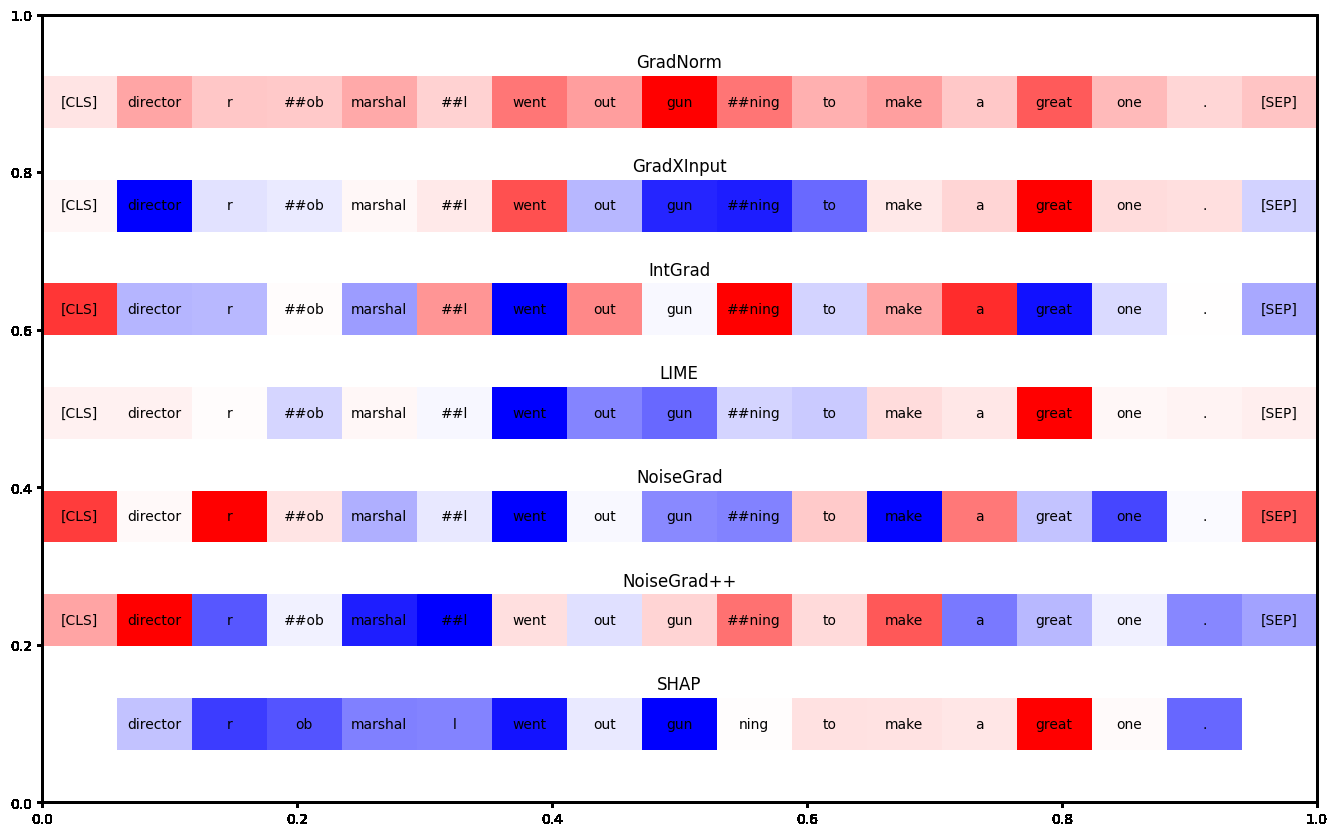

In [11]:
qn.visualise_explanations_as_pyplot(a_batch, xai_methods)

Gradient-based XAI methods can be called as well with plain-text inputs, as well as directly with token embeddings.
In practise this means, that for robustness metrics they can be used in combination with plain-text perturbation functions (e.g., typo_replacement)
and numerical ones (e.g., gaussian_noise). To verify which XAI methods support passing token embeddings we can see output of `quantus.nlp.available_numerical_xai_methods()`

In [12]:
qn.available_numerical_xai_methods()

['GradNorm', 'GradXInput', 'IntGrad', 'NoiseGrad', 'NoiseGrad++']